In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [8]:
df=pd.read_csv('//Users//roshansiva//Downloads//cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

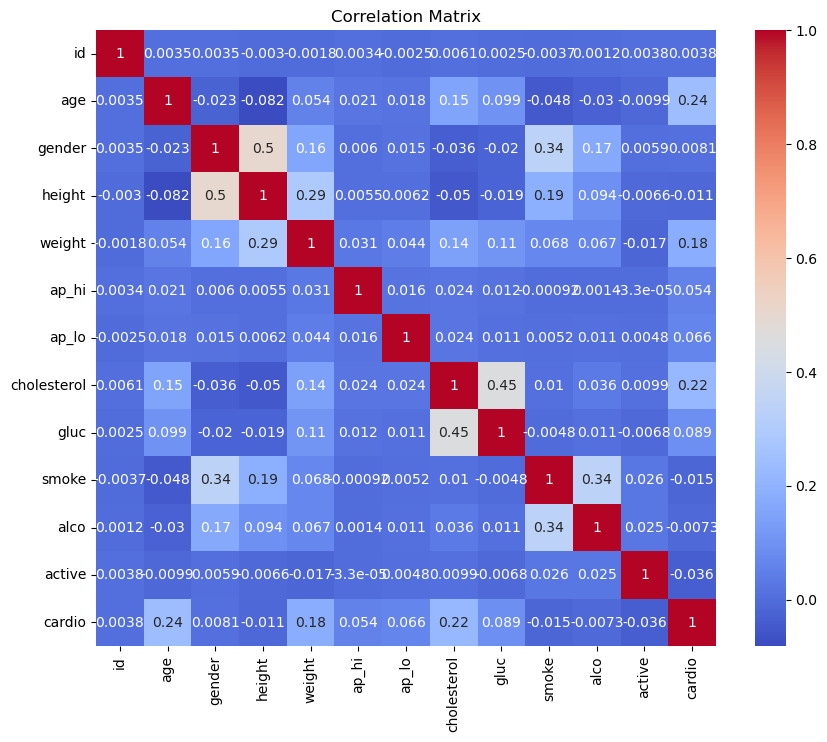

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


<Axes: xlabel='cholesterol', ylabel='cardio'>

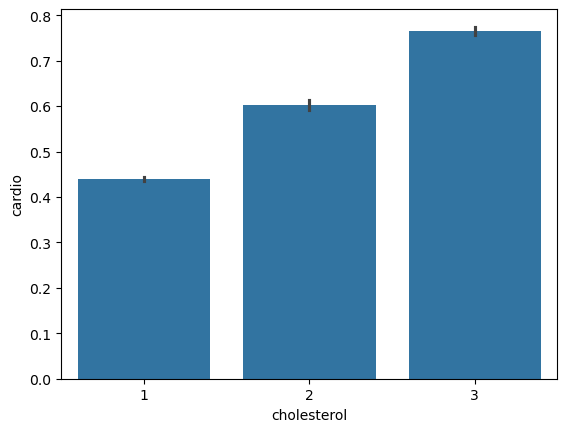

In [11]:
sns.barplot(x='cholesterol',y='cardio',data=df)

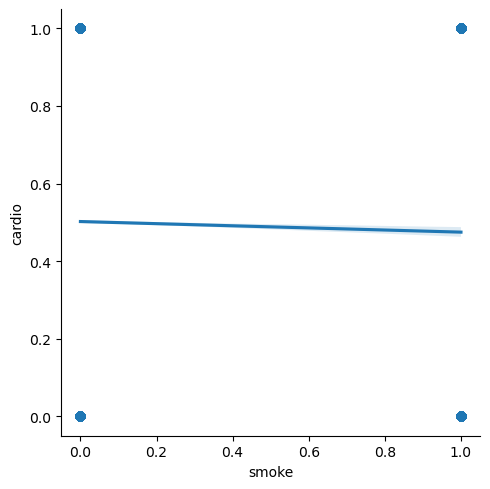

In [12]:
sns.lmplot(x='smoke',y='cardio',data=df)

<Axes: xlabel='alco', ylabel='cardio'>

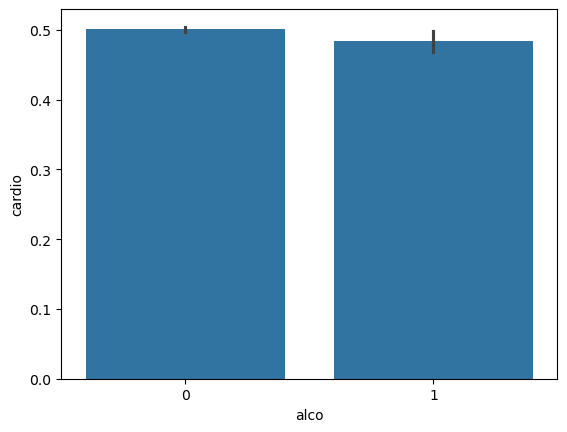

In [13]:
sns.barplot(x='alco',y='cardio',data=df)

In [14]:
X=df.iloc[:,1:12]
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [15]:
X['age_years'] = df['age'] / 365.25
X['age_years']

0        50.357290
1        55.381246
2        51.627652
3        48.249144
4        47.841205
           ...    
69995    52.676249
69996    61.878166
69997    52.199863
69998    61.412731
69999    56.235455
Name: age_years, Length: 70000, dtype: float64

In [16]:
X['age_years'] = X['age_years'].round()
X['age_years']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age_years, Length: 70000, dtype: float64

In [17]:
df_clean = df[(df['ap_hi'] <= 250) & (df['ap_hi'] >= 50) & (df['ap_lo'] <= 200) & (df['ap_lo'] >= 30)]
X = df_clean.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
y = df_clean.iloc[:, 12]

In [18]:
y=df.iloc[:,12:]
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [19]:
from sklearn.model_selection import train_test_split
y = df_clean['cardio']  # Ensure y matches X from df_clean
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
31374,19594,1,152,57.0,110,70,1,1,0,0,0
11615,20499,2,184,78.0,120,80,1,1,0,0,1
12269,20026,2,168,64.0,120,80,1,1,0,0,1
55921,15301,1,163,69.5,120,60,1,1,0,1,1
13599,15893,2,172,93.0,110,70,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37857,18078,1,160,58.0,120,80,1,1,0,0,1
6382,20504,1,165,60.0,110,70,1,1,0,0,1
55842,18122,1,158,92.0,150,100,1,2,0,0,1
872,17476,2,174,75.0,140,90,3,1,0,0,1


In [21]:
y_train

31374    0
11615    0
12269    0
55921    0
13599    0
        ..
37857    0
6382     0
55842    1
872      1
16075    1
Name: cardio, Length: 55024, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [25]:
#By Logistic Regression
logi_model=LogisticRegression()
logi_model.fit(X_train,y_train)

LogisticRegression()

In [26]:
ans=logi_model.predict(X_test)
ans

array([0, 0, 0, ..., 0, 1, 1])

In [27]:
accuracy_score=logi_model.score(X_test,y_test)
accuracy_score

0.7221778003925274

In [28]:
print(f'Logistic Regression Accuracy: {accuracy_score:.2f}')

Logistic Regression Accuracy: 0.72


In [29]:
precision_score=logi_model.score(X_test,y_test)
precision_score

0.7221778003925274

In [30]:
print(f'Logistic Regression Precision: {precision_score:.2f}')

Logistic Regression Precision: 0.72


In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[5459, 1573],
       [2249, 4476]])

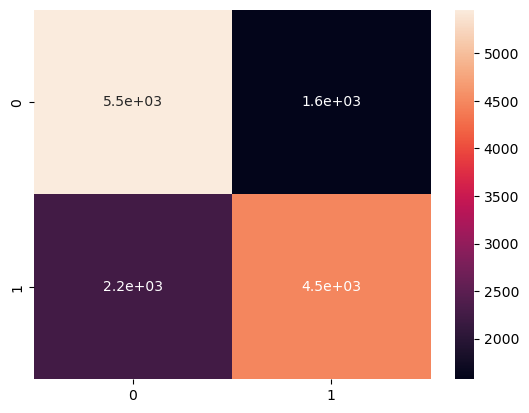

In [32]:
sns.heatmap(cm,annot=True)
plt.show()

In [33]:
#By KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
ans=knn.predict(X_test)
ans

array([0, 1, 0, ..., 0, 1, 1])

In [35]:
accuracy_score=knn.score(X_test,y_test)
accuracy_score

0.684815003271062

In [36]:
print(f'KNeighborsClassifier accuracy: {accuracy_score:.2f}')

KNeighborsClassifier accuracy: 0.68


In [37]:
precision_score=knn.score(X_test,y_test)
precision_score

0.684815003271062

In [38]:
print(f'KNeighborsClassifier precision: {precision_score:.2f}')

KNeighborsClassifier precision: 0.68


In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[4871, 2161],
       [2175, 4550]])

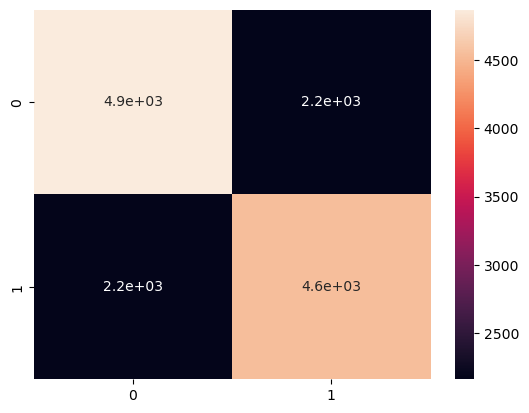

In [40]:
sns.heatmap(cm,annot=True)
plt.show()

In [41]:
#By Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
ans=dtc.predict(X_test)
ans

array([1, 0, 1, ..., 1, 0, 1])

In [43]:
accuracy_score=dtc.score(X_test,y_test)
accuracy_score

0.6273896925201715

In [44]:
print(f'Decision Tree Classifier accuracy: {accuracy_score:.2f}')

Decision Tree Classifier accuracy: 0.63


In [45]:
precision_score=dtc.score(X_test,y_test)
precision_score

0.6273896925201715

In [46]:
print(f'Decision Tree Classifier precision: {precision_score:.2f}')

Decision Tree Classifier precision: 0.63


In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[4428, 2604],
       [2522, 4203]])

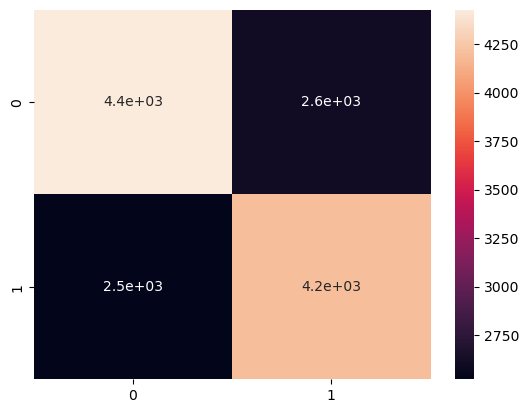

In [48]:
sns.heatmap(cm,annot=True)
plt.show()

In [49]:
#By Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
ans=rfc.predict(X_test)
ans

array([0, 0, 0, ..., 1, 0, 1])

In [51]:
accuracy_score=rfc.score(X_test,y_test)
accuracy_score

0.705895180635313

In [52]:
print(f'Random Forest Classifier accuracy: {accuracy_score:.2f}')

Random Forest Classifier accuracy: 0.71


In [53]:
precision_score=rfc.score(X_test,y_test)
precision_score

0.705895180635313

In [54]:
print(f'Random forest classifier precision: {precision_score:.2f}')

Random forest classifier precision: 0.71


In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[5040, 1992],
       [2054, 4671]])

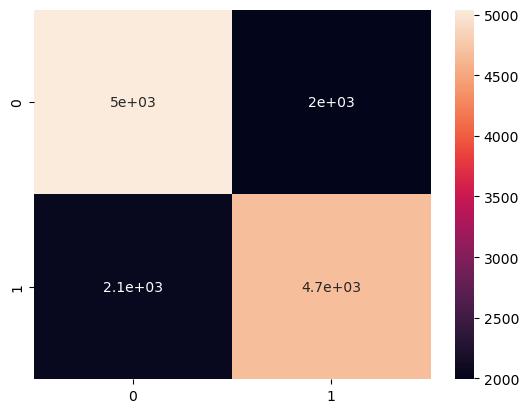

In [56]:
sns.heatmap(cm,annot=True)
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [59]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracy_results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))



SVM Accuracy: 0.7304
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7032
           1       0.75      0.67      0.71      6725

    accuracy                           0.73     13757
   macro avg       0.73      0.73      0.73     13757
weighted avg       0.73      0.73      0.73     13757


KNN Accuracy: 0.6848
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      7032
           1       0.68      0.68      0.68      6725

    accuracy                           0.68     13757
   macro avg       0.68      0.68      0.68     13757
weighted avg       0.68      0.68      0.68     13757


Decision Tree Accuracy: 0.6272
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      7032
           1       0.62      0.62      0.62      6725

    accuracy                           0.63     13757
   macro avg       0.63      0.63      0.63     1375

In [60]:
if 'accuracy_results' in globals() and 'models' in globals():
	best_model_name = max(accuracy_results, key=accuracy_results.get)
	best_model = models[best_model_name]
	print(f"\nBest Model: {best_model_name} with Accuracy {accuracy_results[best_model_name]:.4f}")

	# Example prediction
	sample = X_test[0].reshape(1, -1)
	prediction = best_model.predict(sample)
	print(f"Sample Prediction: {'Disease' if prediction[0] == 1 else 'No Disease'}")
else:
	print("❌ Error: accuracy_results or models is not defined. Please run the previous cells.")



Best Model: SVM with Accuracy 0.7304
Sample Prediction: Disease


In [61]:
# Save trained model for Flask
import pickle

try:
	pickle.dump(best_model, open("cardiac_model.pkl", "wb"))
	print("✅ Model saved as cardiac_model.pkl")
except NameError:
	print("❌ Error: best_model is not defined. Please run the cell where best_model is assigned.")


✅ Model saved as cardiac_model.pkl
